<a href="https://colab.research.google.com/github/Frany-oss/Covid-in-Peru/blob/main/Covid_In_Peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid In Peru
Is it well known that Peru is the one of the countries (if not the one) that is worse managing the pandemic. So, I found the public dataset from de goberment fram the deaths and the positive cases from covid 03-03-2021 (Day that I start this notebook).

The goal is to see the progress of deaths and infected people, also to see the cooralation they have. Then I'm going to focuse on Lima, because is the Capital and is were a third of the population lives (including myself).

In this Notebook I'm not gonna use Machine Learning (at the moment).

### Dependencies

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Loading Data

In [4]:
death_cases = pd.read_csv('/content/sample_data/fallecidos_covid.csv', encoding='latin-1', sep = ';', parse_dates = ['FECHA_FALLECIMIENTO'])
positive_cases = pd.read_csv('/content/sample_data/positivos_covid.csv', encoding='latin-1', sep = ';', parse_dates = ['FECHA_RESULTADO'])

positive_cases.head(10)

(1332939, 9)

In [29]:
death_cases.head(10)

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210228,d9f43aa5a915db32d9da922ee2a7d06c,2020-06-13,40,FEMENINO,19790730.0,LA LIBERTAD,TRUJILLO,FLORENCIA DE MORA
1,20210228,78fe72afd9bd03d10414503a5e50337d,2020-06-13,50,MASCULINO,19690723.0,LIMA,LIMA,VILLA EL SALVADOR
2,20210228,d892c9b6ce147f154de5e13039d15b62,2020-06-13,32,FEMENINO,19871017.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO
3,20210228,6dd24a13ccae0ce1032e6977933cf7e2,2020-06-13,46,MASCULINO,19730710.0,ANCASH,HUARAZ,TARICA
4,20210228,b8293f40152245f3652bf996a5098509,2020-06-13,49,MASCULINO,19700810.0,LIMA,LIMA,SAN JUAN DE LURIGANCHO
5,20210228,d4522e90eeca10ed9a9759e40bdbd9fc,2020-06-13,89,FEMENINO,19300916.0,CUSCO,CUSCO,SAN SEBASTIAN
6,20210228,144f94e8cde4e8d436cdd58de7cf3cd1,2020-06-13,28,MASCULINO,19910809.0,CALLAO,CALLAO,LA PERLA
7,20210228,b44a32ae0076ec2dec9ce3a026e6b333,2020-06-13,58,MASCULINO,19620419.0,SAN MARTIN,MARISCAL CACERES,JUANJUI
8,20210228,84f41e697d50c3b94bf182eea6d98892,2020-06-13,71,MASCULINO,19490413.0,ANCASH,SANTA,CHIMBOTE
9,20210228,0f40dc1cfe8a16a87f18c968d3fc6e3b,2020-06-13,59,MASCULINO,19610216.0,LIMA,LIMA,COMAS


In [5]:
positive_cases.rename(columns={'ï»¿FECHA_CORTE': 'FECHA_CORTE'}, inplace = True)

positive_cases.head(2)

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210228,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,HUAROCHIRI,SAN ANTONIO,PR,41.0,FEMENINO,2020-05-26
1,20210228,e81602051997ace8340bb8c18fe24c65,APURIMAC,ABANCAY,ABANCAY,PR,32.0,FEMENINO,2020-04-25


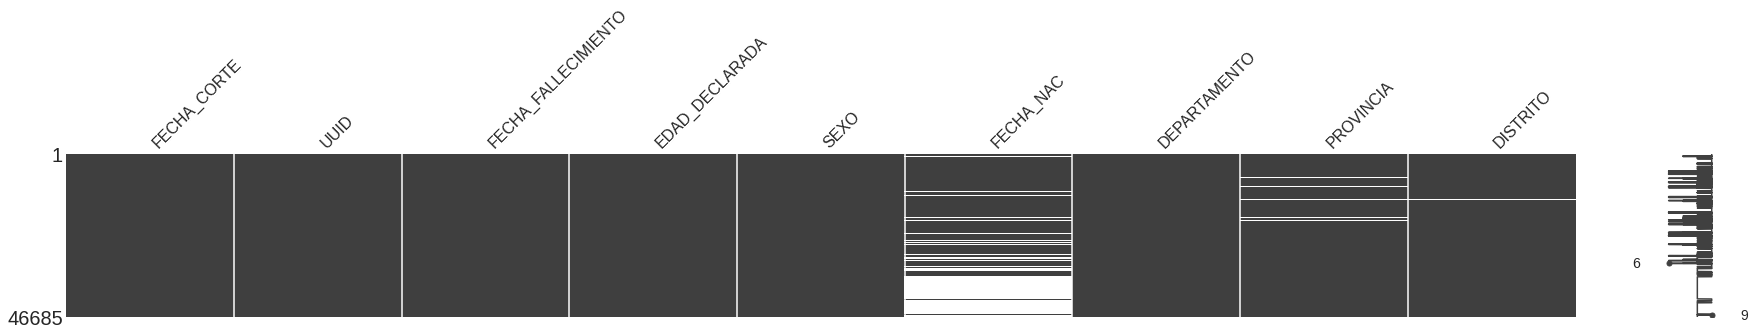

In [7]:
# Analyzing if we have any missing values in our dataset (the white spaces are the missing values)
missingno.matrix(death_cases, figsize=(30, 3))

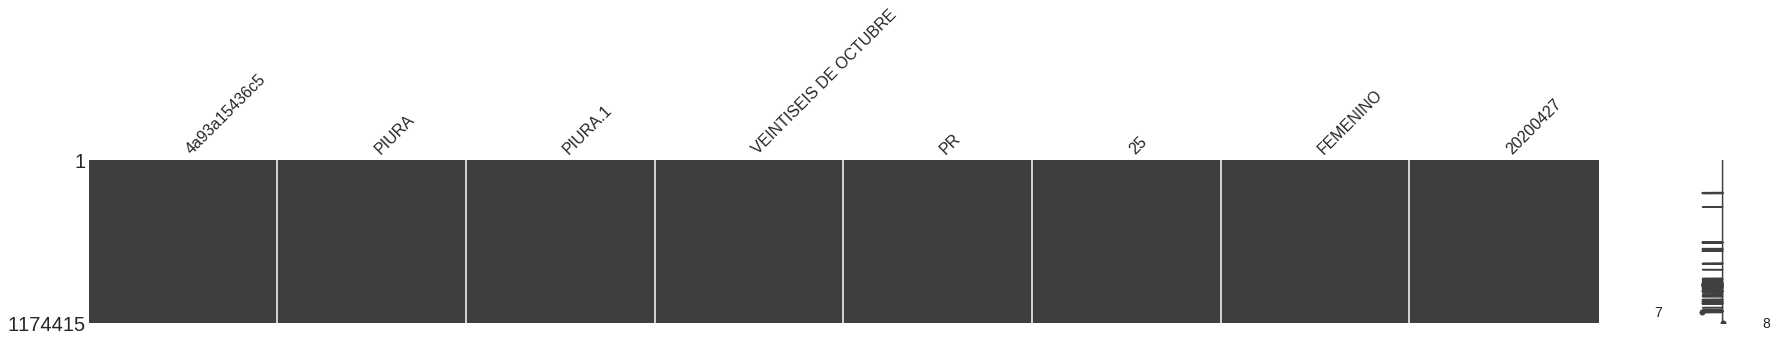

In [8]:
missingno.matrix(positive_cases, figsize=(30, 3))

In [9]:
# All the missing values (or null)
death_cases.isnull().sum()

FECHA_CORTE                0
UUID                       0
FECHA_FALLECIMIENTO        0
EDAD_DECLARADA             0
SEXO                       0
FECHA_NAC              14938
DEPARTAMENTO               0
PROVINCIA                851
DISTRITO                 321
dtype: int64

Text(0.5, 1.0, 'Deaths in Peru by Department')

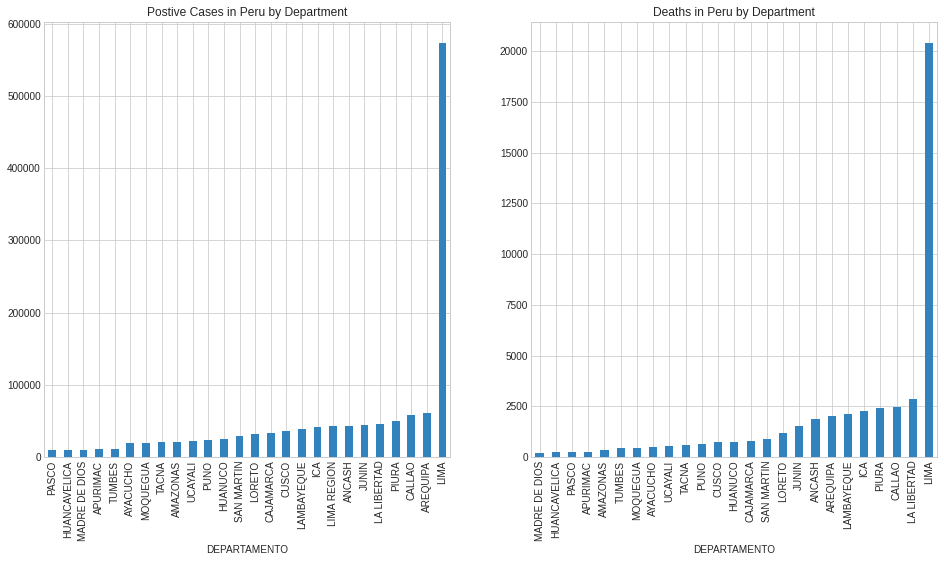

In [6]:
fig = plt.figure(figsize= (16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

positive_cases.groupby('DEPARTAMENTO').DEPARTAMENTO.count().sort_values().plot.bar(cmap="tab20c", ax=ax1)
ax1.set_title("Postive Cases in Peru by Department")

death_cases.groupby('DEPARTAMENTO').DEPARTAMENTO.count().sort_values().plot.bar(cmap="tab20c", ax=ax2)
ax2.set_title("Deaths in Peru by Department")

Text(0.5, 0, 'Date')

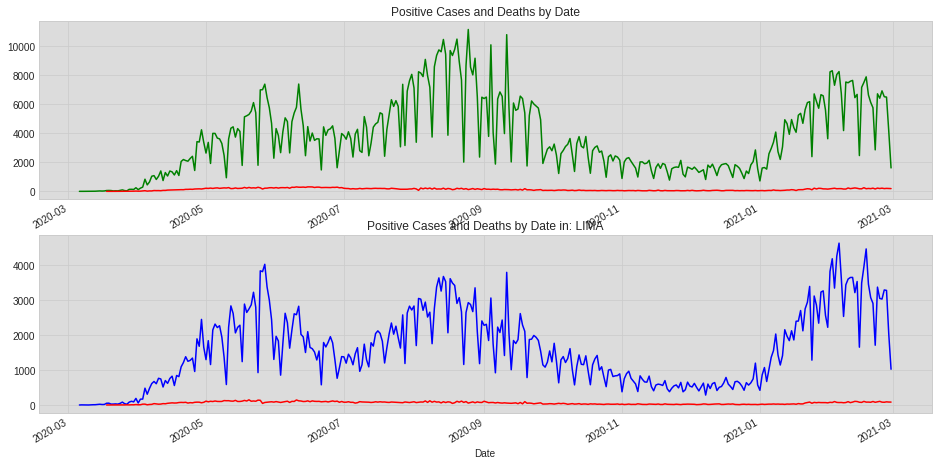

In [20]:
region = 'LIMA'
region_pos = positive_cases[positive_cases.DEPARTAMENTO == region]
region_fall = death_cases[death_cases.DEPARTAMENTO == region]

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

positive_cases.groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax1, color = "green")
death_cases.groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax1, color= "red")

ax1.set_title("Positive Cases and Deaths by Date")
ax1.set_facecolor("gainsboro")
ax1.set_xlabel('')

region_pos.groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax2, color = "blue")
region_fall.groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax2, color= "red")

ax2.set_title("Positive Cases and Deaths by Date in: " + region)
ax2.set_facecolor("gainsboro")
ax2.set_xlabel('Date')

Text(0.5, 1.0, 'Deaths from Lima compared to La Libertad')

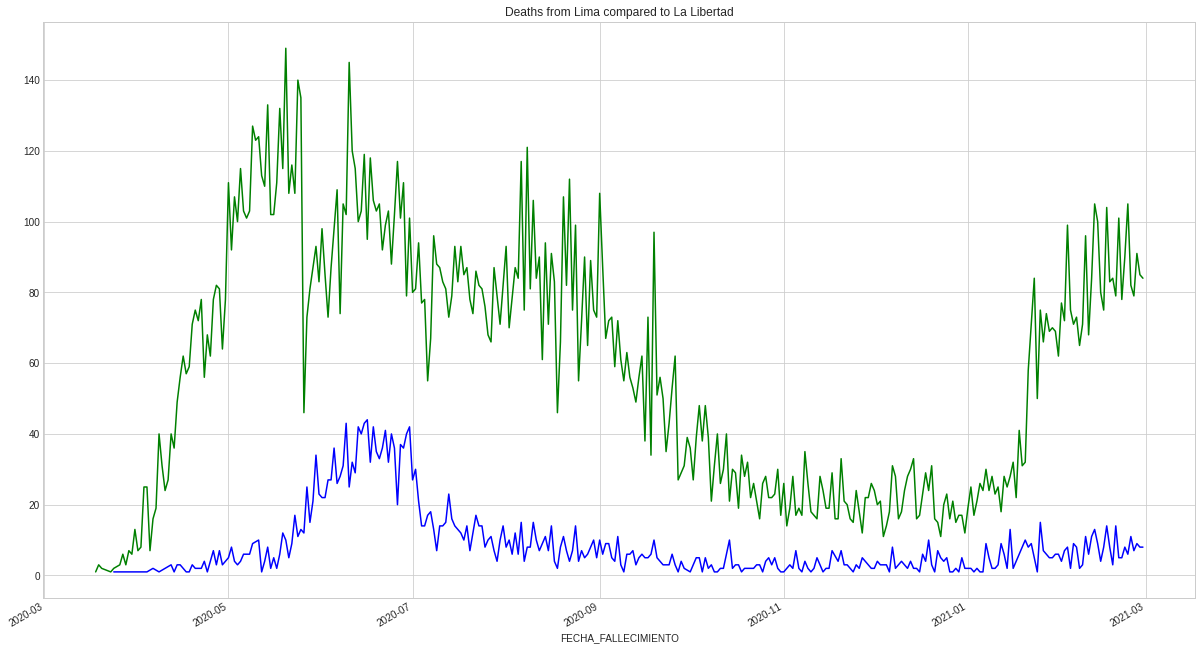

In [31]:
# Comparing the deaths from the capital Lima and the second region with most deaths
fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([0,0,1,1])

region_fall.groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "LIMA", color= "green")
death_cases[death_cases.DEPARTAMENTO == 'LA LIBERTAD'].groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "LA LIBERTAD", color= "blue")

plt.title("Deaths from Lima compared to La Libertad")
